In [1]:
# Importar as bibliotecas necessárias
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
pd.set_option('display.max_columns', None)

In [2]:
# Abrir as tabelas .csv como dataframes de trabalho
users = pd.read_csv('../CSVs/tbl_users.csv', sep=';', low_memory=False)
events = pd.read_csv('../CSVs/tbl_events.csv', low_memory=False)
users_events = pd.read_csv('../CSVs/tbl_users_events.csv', low_memory=False)
analise = pd.read_csv('../CSVs/gg_analise_db1.csv', sep=';', low_memory=False)
users_games = pd.read_csv('../CSVs/tbl_users_games.csv', low_memory=False)
games = pd.read_json('../CSVs/tbl_games.json')
friends = pd.read_csv('../CSVs/tbl_friends.csv', low_memory=False)
chats = pd.read_csv('../CSVs/tbl_chat_members.csv', low_memory=False)
plataformas = pd.read_csv('../CSVs/tbl_platforms.csv', low_memory=False)
platforms = pd.read_csv('../CSVs/tbl_users_platforms.csv', low_memory=False)
logs = pd.read_csv('../CSVs/tbl_users_login_log.csv', low_memory=False)

In [33]:
users2 = pd.read_csv('/Users/Marcus/Google Drive/**PaPi/Educação/Cursos Livres/Data Science - Tera/Projeto GoGame/MySQL/Tables_SQL/tbl_users.csv', sep=';', low_memory=False)

In [3]:
# Ao tentar fazer a mudança para INT, apareceram erros devido a alguns dados da coluna não serem numéricos.
# Aí eu busquei esses, que eram poucos, para eliminar as linhas.
users.loc[users['id']=='   "']
users.loc[users['id']=='?>"']

# Eliminando as linhas problemáticas.
users.drop(index=16790, inplace=True)
users.drop(index=22557, inplace=True)

# Aí, sim, alterando a coluna id para INT.
users.id = users.id.astype(int)

In [4]:
gg_users = users.set_index('id', drop=True)
gg_users.rename_axis('user_id', inplace=True)

In [5]:
# Vamos agrupar diversas informações por id de usuário para facilitar as análises.

grouped_games = users_games.groupby(by='user_id').count()
grouped_games.rename(columns={'id':'qtde_games'}, inplace=True)
grouped_games.drop(columns=['game_id', 
                            'platform_id', 
                            'network_id', 
                            'is_favorite', 
                            'status_id'], 
                   inplace=True
                  )

events.rename(columns={'created_by':'user_id'}, inplace=True)
grouped_events = events.groupby(by='user_id').count()
grouped_events.rename(columns={'id':'qtde_grupos'}, inplace=True)
grouped_events.drop(grouped_events.iloc[:, 1:], inplace = True, axis = 1) 

grouped_friends = friends.groupby(by='user_id').count()
grouped_friends.drop(columns=['id'], inplace=True)
grouped_friends.rename(columns={'friend_id':'qtde_contatos'}, inplace=True)

grouped_user_events = users_events.groupby(by='user_id').count()
grouped_user_events.rename(columns={'id':'qtde_eventos'}, inplace=True)
grouped_user_events.drop(grouped_user_events.iloc[:, 1:], inplace = True, axis = 1) 

chats_grouped = chats.groupby(by='user_id').count()
chats_grouped.rename(columns={'chat_id':'qtde_mensagens'}, inplace=True)
chats_grouped.drop(chats_grouped.iloc[:, 1:], inplace = True, axis = 1) 

platforms_grouped = platforms.groupby(by='user_id').count()
platforms_grouped.rename(columns={'id':'qtde_plataformas'}, inplace=True)
platforms_grouped.drop(platforms_grouped.iloc[:, 1:], inplace = True, axis = 1) 

grouped_logs = logs.groupby(by='user_id').count()
grouped_logs.rename(columns={'id':'qtde_acessos'}, inplace=True)
grouped_logs.drop(columns=['login_datetime'], inplace=True)

In [6]:
# Agora reunimos todos os dataframes em um único, com o user_id como chave.

users_gg = pd.concat([gg_users, 
                      grouped_games, 
                      grouped_events, 
                      grouped_friends, 
                      grouped_user_events, 
                      chats_grouped, 
                      platforms_grouped, 
                      grouped_logs], 
                      axis = 1
                    )

In [7]:
# Vamos preencher os dados faltantes com 0.

users_gg["qtde_games"].fillna(0, inplace=True)
users_gg["qtde_grupos"].fillna(0, inplace=True)
users_gg["qtde_contatos"].fillna(0, inplace=True)
users_gg["qtde_eventos"].fillna(0, inplace=True)
users_gg["qtde_mensagens"].fillna(0, inplace=True)
users_gg["qtde_plataformas"].fillna(0, inplace=True)
users_gg["qtde_acessos"].fillna(0, inplace=True)

### Verificando quais são os jogos com mais usuários no app.

In [8]:
games

,id,igdb_id,original_id,name,slug,summary,rating,release_date,cover_base_url,cover_image_png
0,1,1649,NaN,007 Legends,007-legends,"007 Legends features an original, overarching ...",51.0024,2012-10-16,https://images.igdb.com/igdb/image/upload/,co203u
1,11,1646,NaN,007: Quantum of Solace,007-quantum-of-solace,Introducing a more lethal and cunningly effici...,65.6849,2008-10-31,https://images.igdb.com/igdb/image/upload/,u3vzkrjukgugpeuc6lu1
2,21,9583,NaN,0rbitalis,0rbitalis,0rbitalis is a satellite launching simulator w...,NaN,2015-05-28,https://images.igdb.com/igdb/image/upload/,ay5hez5uyl9lrmpxj0jw
3,31,9705,NaN,"10,000,000",10000-000,"10,000,000 is an award winning hybrid RPG/Acti...",NaN,2013-01-01,https://images.igdb.com/igdb/image/upload/,xkbyiqn6csbu43sxdzch
4,41,8617,NaN,1001 Spikes,1001-spikes,Aban Hawkins & the 1000 Spikes is an 8-bit ret...,60.0951,2014-06-03,https://images.igdb.com/igdb/image/upload/,co1omq
...,...,...,...,...,...,...,...,...,...,...
33161,117372,140757,NaN,Shirahana no Ori - Hiiro no Kakera 4: Shiki no...,shirahana-no-ori-hiiro-no-kakera-4-shiki-no-u,A sequel to Shirahana no Ori - Hiiro no Kakera...,NaN,2013-09-05,https://images.igdb.com/igdb/image/upload/,co2k0o
33162,117373,136791,NaN,Hoshi Ori Yume Mirai: Converted Edition,hoshi-ori-yume-mirai-converted-edition,None,NaN,None,https://images.igdb.com/igdb/image/upload/,None
33163,117374,136149,NaN,Ori and the Will of the Wisps: Collector's Edi...,ori-and-the-will-of-the-wisps-collectors-edit,None,NaN,None,https://images.igdb.com/igdb/image/upload/,None
33164,117375,42982,NaN,Dark Souls - Limited Edition,dark-souls-limited-edition,"A spiritual successor to Demons Souls, the act...",NaN,2011-11-04,https://images.igdb.com/igdb/image/upload/,None


In [9]:
games.rename(columns={'id':'game_id'}, inplace=True)
games.set_index('game_id', inplace=True)

# Vamos agrupar os dados de número de usuários por game_id. Assim saberemos quantos usuários cada jogo tem.

usersgames_grouped = users_games.groupby(by='game_id').count()
usersgames_grouped.rename(columns={'id':'qtde_users_by_game'}, inplace=True)
usersgames_grouped.drop(usersgames_grouped.iloc[:, 1:], inplace = True, axis = 1) 

# Juntamos os dois dataframes para formar a base para os gráficos, com os nomes dos jogos.
games_gg = pd.concat([games, usersgames_grouped], axis = 1)
games_gg.drop(columns=['original_id', 
                       'slug', 
                       'cover_base_url', 
                       'cover_image_png'], 
              inplace=True
             )
games_gg["qtde_users_by_game"].fillna(0, inplace=True)

In [10]:
games_gg

,igdb_id,name,summary,rating,release_date,qtde_users_by_game
game_id,,,,,,
1,1649,007 Legends,"007 Legends features an original, overarching ...",51.0024,2012-10-16,18.0
11,1646,007: Quantum of Solace,Introducing a more lethal and cunningly effici...,65.6849,2008-10-31,74.0
21,9583,0rbitalis,0rbitalis is a satellite launching simulator w...,NaN,2015-05-28,1.0
31,9705,"10,000,000","10,000,000 is an award winning hybrid RPG/Acti...",NaN,2013-01-01,1.0
41,8617,1001 Spikes,Aban Hawkins & the 1000 Spikes is an 8-bit ret...,60.0951,2014-06-03,23.0
...,...,...,...,...,...,...
117372,140757,Shirahana no Ori - Hiiro no Kakera 4: Shiki no...,A sequel to Shirahana no Ori - Hiiro no Kakera...,NaN,2013-09-05,0.0
117373,136791,Hoshi Ori Yume Mirai: Converted Edition,None,NaN,None,0.0
117374,136149,Ori and the Will of the Wisps: Collector's Edi...,None,NaN,None,0.0


In [ ]:
grouped_games_tot = users_games.groupby(by='user_id').count()

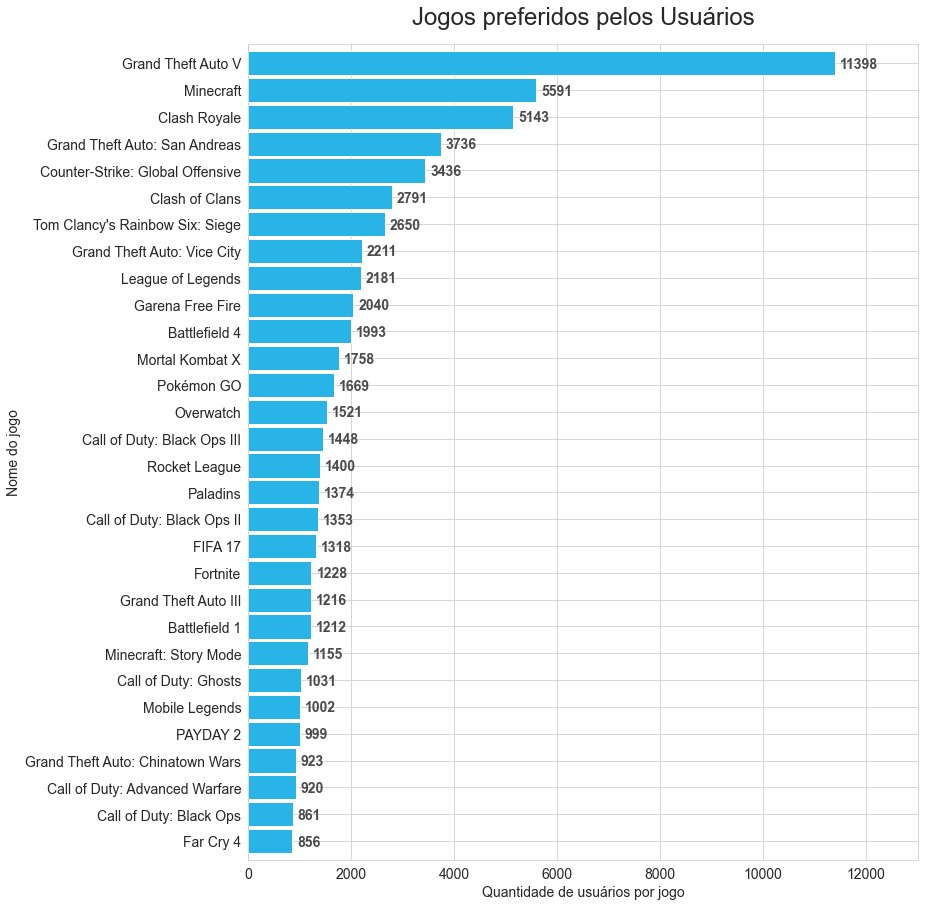

In [53]:
# Gerando o gráfico para analisar os usuários por jogo.

ax = games_plot.plot(x='name', 
                     y='qtde_users_by_game', 
                     kind='barh', 
                     figsize=(12, 15), 
                     width=0.9,
                     legend=False, 
                     xlim=(0, 13000), 
                     color='#28b4e7',
                     fontsize=14
                    )
ax.invert_yaxis()
ax.set_title('Jogos preferidos pelos Usuários', fontsize=24, loc='center', pad=20)
ax.set_xlabel('Quantidade de usuários por jogo', fontsize=14) 
ax.set_ylabel('Nome do jogo', fontsize=14) 
for p in ax.patches:
    ax.annotate(str(int(p.get_width())), 
                (p.get_x() + p.get_width(), 
                p.get_y()+1), 
                xytext=(5, 10), 
                textcoords='offset points', 
                va='baseline', 
                fontsize=14, 
                fontweight='bold', 
                color='#4b4b4b'
                )
plt.savefig(os.path.join('../Imagens/users_by_game.pdf'), 
            dpi=300, 
            format='pdf', 
            bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [27]:
# Vamos ordenar a lista e selecionar os 30 maiores jogos para formar o gráfico.
games_plot = games_gg.sort_values("qtde_users_by_game", ascending=False).head(30)

# Vamos ordenar novamente a lista e selecionar varias faixas de maiores jogos para calcular a média de usuários por jogo.
games_plot100 = games_gg.sort_values("qtde_users_by_game", ascending=False).head(100)

games_plot500 = games_gg.sort_values("qtde_users_by_game", ascending=False).head(500)

games_plot1000 = games_gg.sort_values("qtde_users_by_game", ascending=False).head(1000)

games_plot_tot = games_gg.sort_values("qtde_users_by_game", ascending=False)

In [12]:
games_plot2.describe()

,igdb_id,rating,qtde_users_by_game
count,100.000000,95.000000,100.000000
mean,9861.600000,73.253525,1062.200000
std,18271.324859,18.770973,1372.772598
min,115.000000,5.649230,419.000000
25%,1240.500000,70.761100,479.500000
50%,5597.500000,76.099100,646.000000
75%,10988.500000,82.640750,999.750000
max,131800.000000,95.607900,11398.000000


In [16]:
games_plot.describe()

,igdb_id,rating,qtde_users_by_game
count,30.000000,29.000000,30.00000
mean,9426.766667,77.335517,2213.80000
std,16313.443241,7.448417,2106.48068
min,115.000000,63.405400,856.00000
25%,1184.500000,73.061700,1169.25000
50%,6110.500000,77.458900,1424.00000
75%,10775.750000,82.390100,2203.50000
max,87622.000000,91.007800,11398.00000


In [17]:
games_plot100.describe()

,igdb_id,rating,qtde_users_by_game
count,100.000000,95.000000,100.000000
mean,9861.600000,73.253525,1062.200000
std,18271.324859,18.770973,1372.772598
min,115.000000,5.649230,419.000000
25%,1240.500000,70.761100,479.500000
50%,5597.500000,76.099100,646.000000
75%,10988.500000,82.640750,999.750000
max,131800.000000,95.607900,11398.000000


In [18]:
games_plot500.describe()

,igdb_id,rating,qtde_users_by_game
count,500.000000,419.000000,500.000000
mean,10487.412000,63.024195,372.864000
std,16611.370324,28.883246,705.906104
min,0.000000,4.818420,101.000000
25%,1275.250000,65.301050,144.000000
50%,5323.500000,74.924600,204.000000
75%,13423.250000,81.159650,363.500000
max,131800.000000,95.607900,11398.000000


In [23]:
games_plot1000.describe()

,igdb_id,rating,qtde_users_by_game
count,1000.000000,767.000000,1000.000000
mean,11340.001000,60.216479,221.260000
std,17760.734179,30.107614,521.561604
min,0.000000,4.818420,48.000000
25%,1363.250000,52.180200,68.000000
50%,5625.500000,73.276500,101.000000
75%,16002.750000,80.731850,203.500000
max,135400.000000,95.607900,11398.000000


In [29]:
print(games_plot1000['qtde_users_by_game'].sum() / games_plot_tot['qtde_users_by_game'].sum())

0.7340928846804642


### Verificando a quantidade de usuários por plataforma.

In [83]:
plataformas

,igdb_id,name,label,icon,network_id,is_active
platform_id,,,,,,
1,6,Windows,PC,t_consoles/v1476385962/windows_ichwlp,3.0,1
2,9,PlayStation 3,PS3,t_consoles/v1476385962/ps3_cmvvjo,1.0,1
3,48,PlayStation 4,PS4,t_consoles/v1476385962/ps4_l7ploj,1.0,1
4,46,PlayStation Vita,PSVita,t_consoles/v1476385962/psvita_jwfhcp,1.0,1
5,12,Xbox 360,X360,t_consoles/v1476385962/x360_wnhdrx,2.0,1
6,49,Xbox One,XONE,t_consoles/v1476385962/xone_wv2rni,2.0,1
7,37,Nintendo 3DS,3DS,t_consoles/v1476385962/3ds_sbky4f,4.0,1
8,5,Wii,Wii,t_consoles/v1499450416/wii_whu4s0,4.0,1
9,41,Wii U,WiiU,t_consoles/v1476385962/wiiu_rb9uax,4.0,1


In [81]:
platforms

,id,user_id,platform_id
0,160,6,13
1,168,7,10
2,199,10,11
3,200,10,1
4,203,12,6
...,...,...,...
159357,673828,70300,16
159358,673829,51667,3
159359,673830,70980,11
159360,673832,70981,1


In [87]:
plataformas.rename(columns={'id':'platform_id'}, inplace=True)
plataformas.set_index('platform_id', inplace=True)

usersplats_grouped = platforms.groupby(by='platform_id').count()
usersplats_grouped.rename(columns={'id':'qtde_users_by_plat'}, inplace=True)
usersplats_grouped.drop(usersplats_grouped.iloc[:, 1:], inplace = True, axis = 1) 

plats_gg = pd.concat([plataformas, usersplats_grouped], axis = 1)
plats_gg.drop(columns=['igdb_id', 
                       'icon', 
                       'network_id', 
                       'is_active'], 
              inplace=True
             )

In [191]:
plats_gg.describe()

,qtde_users_by_plat
count,27.00
mean,"5,902.30"
std,"7,571.39"
min,10.00
25%,"2,039.50"
50%,"2,764.00"
75%,"7,533.00"
max,"36,066.00"


In [89]:
plats_plot = plats_gg.sort_values("qtde_users_by_plat", ascending=False)

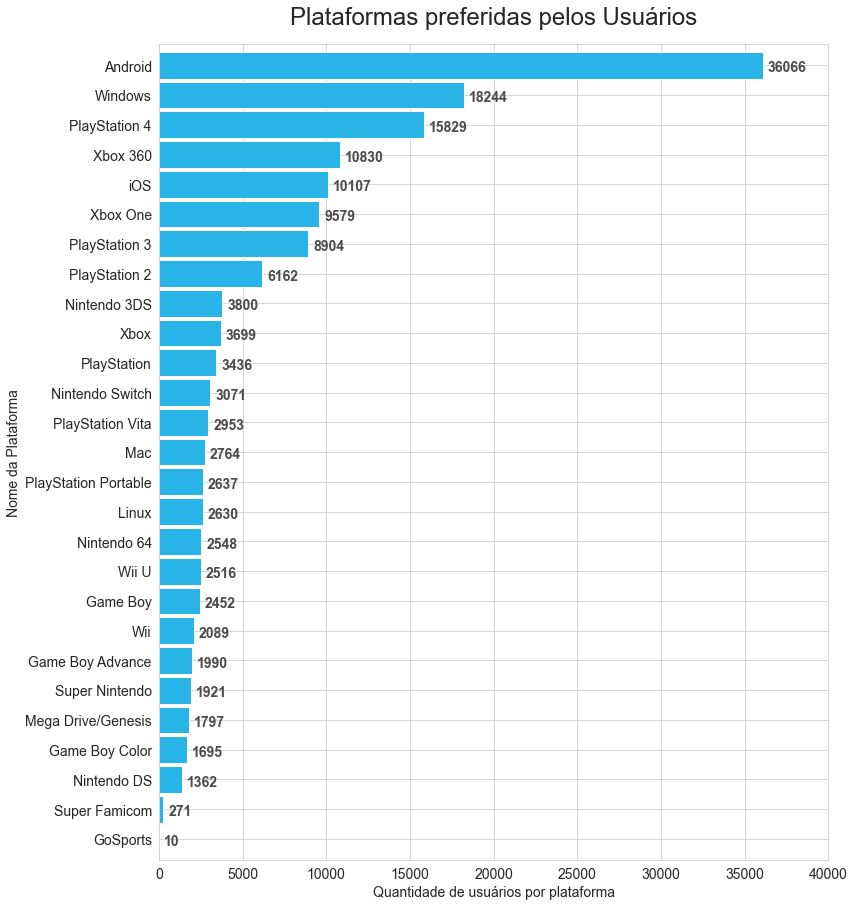

In [93]:
ax = plats_plot.plot(x='name', 
                     y='qtde_users_by_plat', 
                     kind='barh', 
                     figsize=(12, 15), 
                     width=0.9,
                     legend=False, 
                     xlim=(0, 40000), 
                     color='#28b4e7',
                     fontsize=14
                    )
ax.invert_yaxis()
ax.set_title('Plataformas preferidas pelos Usuários', fontsize=24, loc='center', pad=20)
ax.set_xlabel('Quantidade de usuários por plataforma', fontsize=14) 
ax.set_ylabel('Nome da Plataforma', fontsize=14) 
for p in ax.patches:
    ax.annotate(str(int(p.get_width())), 
                (p.get_x() + p.get_width(), 
                p.get_y()+1), 
                xytext=(5, 10), 
                textcoords='offset points', 
                va='baseline', 
                fontsize=14, 
                fontweight='bold', 
                color='#4b4b4b'
                )
plt.savefig(os.path.join('../Imagens/users_by_platform.pdf'), 
            dpi=300, 
            format='pdf', 
            bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [158]:
print(f'Quantidade de Jogos máxima:       {users_gg["qtde_games"].max()}')
print(f'Quantidade de Grupos máxima:      {users_gg["qtde_grupos"].max()}')
print(f'Quantidade de Contatos máxima:    {users_gg["qtde_contatos"].max()}')
print(f'Quantidade de Eventos máxima:     {users_gg["qtde_eventos"].max()}')
print(f'Quantidade de Mensagens máxima:   {users_gg["qtde_mensagens"].max()}')
print(f'Quantidade de Plataformas máxima: {users_gg["qtde_plataformas"].max()}')
print(f'Quantidade de Acessos máxima:     {users_gg["qtde_acessos"].max()}')

Quantidade de Jogos máxima:       4014.0
Quantidade de Grupos máxima:      49.0
Quantidade de Contatos máxima:    5114.0
Quantidade de Eventos máxima:     117.0
Quantidade de Mensagens máxima:   92.0
Quantidade de Plataformas máxima: 49.0
Quantidade de Acessos máxima:     5180.0


In [167]:
print(f'Quantidade de Jogos média:       {round(users_gg["qtde_games"].mean(), ndigits=2)}')
print(f'Quantidade de Grupos média:      {round(users_gg["qtde_grupos"].mean(), ndigits=2)}')
print(f'Quantidade de Contatos média:    {round(users_gg["qtde_contatos"].mean(), ndigits=2)}')
print(f'Quantidade de Eventos média:     {round(users_gg["qtde_eventos"].mean(), ndigits=2)}')
print(f'Quantidade de Mensagens média:   {round(users_gg["qtde_mensagens"].mean(), ndigits=2)}')
print(f'Quantidade de Plataformas média: {round(users_gg["qtde_plataformas"].mean(), ndigits=2)}')
print(f'Quantidade de Acessos média:     {round(users_gg["qtde_acessos"].mean(), ndigits=2)}')

Quantidade de Jogos média:       4.23
Quantidade de Grupos média:      0.09
Quantidade de Contatos média:    2.32
Quantidade de Eventos média:     0.79
Quantidade de Mensagens média:   0.01
Quantidade de Plataformas média: 2.24
Quantidade de Acessos média:     5.25


In [172]:
users_stats = users_gg[['qtde_games', 
                        'qtde_grupos', 
                        'qtde_contatos', 
                        'qtde_eventos', 
                        'qtde_mensagens', 
                        'qtde_plataformas', 
                        'qtde_acessos']]

In [185]:
users_stats.describe()

,qtde_games,qtde_grupos,qtde_contatos,qtde_eventos,qtde_mensagens,qtde_plataformas,qtde_acessos,qtde_games_plot
count,"71,191.00","71,191.00","71,191.00","71,191.00","71,191.00","71,191.00","71,191.00","71,191.00"
mean,4.23,0.09,2.32,0.79,0.01,2.24,5.25,-0.85
std,24.12,0.49,27.28,2.15,0.53,3.77,40.84,1.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.44
25%,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-1.44
50%,1.00,0.00,0.00,0.00,0.00,1.00,1.00,-1.44
75%,3.00,0.00,0.00,1.00,0.00,2.00,2.00,-0.34
max,"4,014.00",49.00,"5,114.00",117.00,92.00,49.00,"5,180.00",6.85


In [30]:
users_gg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71191 entries, 1 to 71195
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   email                     53014 non-null  object 
 1   pass_hash                 26450 non-null  object 
 2   name                      34422 non-null  object 
 3   nickname                  68817 non-null  object 
 4   avatar                    39112 non-null  object 
 5   profile_pic_id            38862 non-null  float64
 6   uploaded_photo_timestamp  3946 non-null   object 
 7   top_image                 11767 non-null  object 
 8   profile_bg_id             11284 non-null  object 
 9   birthday                  0 non-null      float64
 10  gender                    14551 non-null  object 
 11  city                      7220 non-null   object 
 12  state                     3 non-null      object 
 13  country                   0 non-null      float64
 14  ip_cou

In [31]:
users_gg['special_mark'].value_counts()

0    20256
1       56
Name: special_mark, dtype: int64

In [34]:
users2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71193 entries, 0 to 71192
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        71193 non-null  object 
 1   email                     53016 non-null  object 
 2   pass_hash                 26452 non-null  object 
 3   name                      34424 non-null  object 
 4   nickname                  68817 non-null  object 
 5   avatar                    39113 non-null  object 
 6   profile_pic_id            38863 non-null  float64
 7   uploaded_photo_timestamp  3946 non-null   object 
 8   top_image                 11768 non-null  object 
 9   profile_bg_id             11285 non-null  object 
 10  birthday                  0 non-null      float64
 11  gender                    14551 non-null  object 
 12  city                      7222 non-null   object 
 13  state                     4 non-null      object 
 14  countr

In [38]:
users_gg2 = users_gg.loc[users_gg['creation_datetime'] > '2020-07-01']

In [39]:
users_gg2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20120 entries, 51076 to 71195
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   email                     18882 non-null  object 
 1   pass_hash                 6800 non-null   object 
 2   name                      10906 non-null  object 
 3   nickname                  17748 non-null  object 
 4   avatar                    11229 non-null  object 
 5   profile_pic_id            11152 non-null  float64
 6   uploaded_photo_timestamp  740 non-null    object 
 7   top_image                 1074 non-null   object 
 8   profile_bg_id             900 non-null    object 
 9   birthday                  0 non-null      float64
 10  gender                    0 non-null      object 
 11  city                      590 non-null    object 
 12  state                     0 non-null      object 
 13  country                   0 non-null      float64
 14  ip

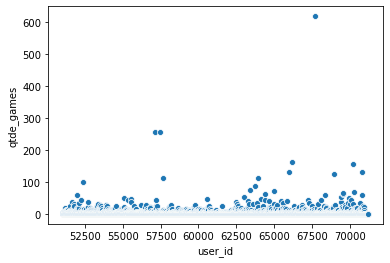

In [40]:
sns.scatterplot(users_gg2.index, users_gg2['qtde_games'], data=users_gg2)

In [41]:
users_gg2.loc[users_gg2['qtde_contatos']>200]

,email,pass_hash,name,nickname,avatar,profile_pic_id,uploaded_photo_timestamp,top_image,profile_bg_id,birthday,gender,city,state,country,ip_country_code,lat,lng,fbid,steam_uid,steam_pic_url,quickblox_id,steam_id,psn_id,xboxlive_id,nintendo_id,gamecenter_id,googleplay_id,battlenet_id,uplay_id,origin_id,youtube_id,twitch_id,phone_country_prefix,phone_country,phone_area,phone_number,creation_datetime,ak_id,ak_number,update_datetime,remember_token,access_token,firebase_id,special_mark,last_login,last_interaction,qtde_games,qtde_grupos,qtde_contatos,qtde_eventos,qtde_mensagens,qtde_plataformas,qtde_acessos
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
57148,willian.o.araujo123@outlook.com,NaN,Willian Oliveira,Will021,https://graph.facebook.com/2649406688710152/pi...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BR,0.000000,0.00000000,2.649407e+15,NaN,NaN,120421405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-13 00:31:09,NaN,NaN,2020-08-13 00:32:05,NaN,hiZGz12vhelyOENNYdG8Dj6sPY5saDcq7XLgQbiVdMxut1...,NaN,0,2020-09-03 20:17:30,2020-09-03 20:17:30,257.0,0.0,2.0,0.0,0.0,8.0,1.0
57479,NaN,NaN,Alyder Moreira Alves,Marovik,https://graph.facebook.com/3629452197069215/pi...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BR,-23.339727,-51.12802286,3.629452e+15,NaN,NaN,120653253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-14 11:27:03,NaN,NaN,2020-09-01 22:33:10,NaN,GACRV+cedSgkm8NL28GDC4lVPXQAvO85azqV4hroCBPz8B...,NaN,0,2020-09-03 20:17:30,2020-09-03 20:17:30,255.0,0.0,1.0,1.0,0.0,19.0,2.0
67691,yudi.sakovicz@gmail.com,NaN,Thiago Yudi,sakovicz,https://graph.facebook.com/461318661495600/pic...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BR,-25.513610,-49.30902970,4.613187e+14,NaN,NaN,122846080.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-01 15:14:50,NaN,NaN,2020-11-17 10:12:13,NaN,/zI01BYVhniY8PgatBKM8W3QlKktEIpbz0mlC6BLK3VYCV...,NaN,0,2020-10-03 15:55:38,2020-11-17 17:27:44,618.0,0.0,12.0,0.0,0.0,23.0,3.0


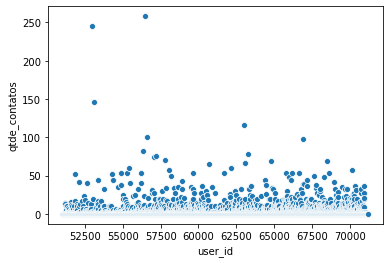

In [42]:
sns.scatterplot(users_gg2.index, users_gg2['qtde_contatos'], data=users_gg2)

In [43]:
users_gg2.loc[users_gg2['qtde_games']>100]

,email,pass_hash,name,nickname,avatar,profile_pic_id,uploaded_photo_timestamp,top_image,profile_bg_id,birthday,gender,city,state,country,ip_country_code,lat,lng,fbid,steam_uid,steam_pic_url,quickblox_id,steam_id,psn_id,xboxlive_id,nintendo_id,gamecenter_id,googleplay_id,battlenet_id,uplay_id,origin_id,youtube_id,twitch_id,phone_country_prefix,phone_country,phone_area,phone_number,creation_datetime,ak_id,ak_number,update_datetime,remember_token,access_token,firebase_id,special_mark,last_login,last_interaction,qtde_games,qtde_grupos,qtde_contatos,qtde_eventos,qtde_mensagens,qtde_plataformas,qtde_acessos
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
52375,donaalerta8@gmail.com,NaN,Iasmim Maria,rebeca,http://res.cloudinary.com/sinergia/image/uploa...,21.0,NaN,http://res.cloudinary.com/sinergia/image/uploa...,16,NaN,NaN,NaN,NaN,NaN,BR,-20.270801,-45.00940850,2.803828e+14,NaN,NaN,117309001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-24 04:33:40,NaN,NaN,2020-07-24 16:46:36,NaN,irY83fJTQXnantZMwLW9KnwTNgPeIHWcbuAFfKoXpIBLcy...,NaN,0,2020-09-03 20:17:30,2020-09-03 20:17:30,101.0,0.0,10.0,1.0,0.0,17.0,1.0
57148,willian.o.araujo123@outlook.com,NaN,Willian Oliveira,Will021,https://graph.facebook.com/2649406688710152/pi...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BR,0.000000,0.00000000,2.649407e+15,NaN,NaN,120421405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-13 00:31:09,NaN,NaN,2020-08-13 00:32:05,NaN,hiZGz12vhelyOENNYdG8Dj6sPY5saDcq7XLgQbiVdMxut1...,NaN,0,2020-09-03 20:17:30,2020-09-03 20:17:30,257.0,0.0,2.0,0.0,0.0,8.0,1.0
57479,NaN,NaN,Alyder Moreira Alves,Marovik,https://graph.facebook.com/3629452197069215/pi...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BR,-23.339727,-51.12802286,3.629452e+15,NaN,NaN,120653253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-14 11:27:03,NaN,NaN,2020-09-01 22:33:10,NaN,GACRV+cedSgkm8NL28GDC4lVPXQAvO85azqV4hroCBPz8B...,NaN,0,2020-09-03 20:17:30,2020-09-03 20:17:30,255.0,0.0,1.0,1.0,0.0,19.0,2.0
57658,carlosgabriel21et@gmail.com,NaN,Carlos Gabriel,CGMRoficial007,https://graph.facebook.com/1019136461889792/pi...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BR,0.000000,0.00000000,1.019136e+15,NaN,NaN,120799927.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-15 09:25:05,NaN,NaN,2020-08-15 09:28:48,NaN,YWnZguPiK2mqpRhMVJnXCxgYetSgC40lY3KGWvvE3oW4F9...,NaN,0,2020-09-03 20:17:30,2020-09-03 20:17:30,114.0,0.0,0.0,0.0,0.0,1.0,1.0
63932,natannmourasousa@gmail.co.com,$2y$10$GHqZfaQTx9Zh6UnklAWOrOUj/INnv1i3.8A8G0n...,NaN,321,http://res.cloudinary.com/sinergia/image/uploa...,19.0,NaN,http://res.cloudinary.com/sinergia/image/uploa...,9,NaN,NaN,NaN,NaN,NaN,BR,NaN,NaN,NaN,NaN,NaN,121821057.0,Natannmourasousa@gma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-31 12:13:45,NaN,NaN,2020-08-31 22:16:00,NaN,OxqglBZDlKZHa1+FLDDiqUyn5wZFGX9+BJ/J90VyZ3O4hG...,NaN,0,2020-09-03 20:17:30,2020-09-03 20:17:30,113.0,0.0,1.0,4.0,0.0,2.0,1.0
65957,nicollaspagotto@gmail.com,$2y$10$fSxnmZsm.lB7i7f208L.Z.KDvAi9T2IYfRWoGmp...,nicollas Pagotto Ramos Vieira,merlincuca,http://res.cloudinary.com/sinergia/image/uploa...,1000.0,v1600198628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BR,NaN,NaN,NaN,NaN,NaN,122287253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-15 16:07:10,NaN,NaN,2020-09-23 05:42:22,NaN,JP2Rdli3+CJsbuJVJ+FIG8NjXXMl2I7RWS6g0uXNxLhAyg...,NaN,0,2020-10-27 15:21:17,2020-09-23 08:36:06,130.0,0.0,0.0,1.0,0.0,25.0,5.0
66183,zzarantonelli@gmail.com,$2y$10$hkC8BLz/dqdZOIuQF6A.VunhGbi.Yr04PH4ME8v...,NaN,ironman,http://res.cloudinary.com/sinergia/image/uploa...,3.0,NaN,http://res.cloudinary.com/sinergia/image/uploa...,14,NaN,NaN,NaN,NaN,NaN,BR,-23.157939,-46.91778170,NaN,NaN,NaN,122367262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-17 15:59:14,NaN,NaN,2020-09-19 10:43:42,NaN,Khm9GX5io68abQLrJvrKyZSO+gtzZKDQbEyHsjzzqIL9SU...,NaN,0,2020-09-19 13:42:42,2020-09-18 11:08:33,162.0,4.0,0.0,4.0,0.0,1.0,